In [1]:
import numpy as np
import os
import segyio

from pyfrac.visualisation.plotting_support import explode_volume

%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
shaheen_incoming = '/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/'
seispath = 'UtahFORGE_GriddedRecs_Pancake/outputs/su/su/'
# seispath = '/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/UtahFORGE_GriddedRecs/outputs/su'
# nr = 210

expname = 'multishot_group19'

In [19]:

def traceimage(data, norm_indiv=False, figsize=[12, 6], cbar=True, clim=1, cmap='seismic', ax=None):
    if norm_indiv:
        data = (data.T / np.max(abs(data), axis=1)).T        

    # clim = np.percentile(abs(data), climQ)

    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    im = ax.imshow(data.T, aspect='auto', interpolation=None,
                   cmap=cmap, vmin=-1 * clim, vmax=clim)
    if cbar: plt.colorbar(im, ax=ax, label='Seis. Amp.')
    ax.set_xlabel('Receiver #')
    ax.set_ylabel('Time')
    ax.set_title('Seismic Recording')
    ax.axis('tight')
    if ax is None: fig.tight_layout()

    return ax

# PARAMETERS TO BE DEFINED

In [20]:
nr = 169
nt = 1000
n_srcs = 50

In [21]:
def read_seis(seisfile, nr):
    # s_wave_file = os.path.join(data_path,'test.bin.curl')
    seis_flat = np.loadtxt(seisfile)

    # determine number of timesamples and ensure it saved fully
    nt = int(seis_flat.shape[0] / nr)
    try:
        seis_flat.reshape((nr, nt))
    except:
        print('Not good dims \n nt:%i nr:%i \n vz flat:%i' % (nt, nr, seis_flat.shape[0]))

    # Resample to 2D
    seis = seis_flat[:nt * nr].reshape((nr, nt))
    return seis

# READ SINGLE SHOT

In [22]:
expname = 'multishot_group00'
srcnum = 1
vx  = read_seis(os.path.join(shaheen_incoming,seispath,'%s_vx.txt.shot%.i'%(expname,srcnum)), nr)
vy  = read_seis(os.path.join(shaheen_incoming,seispath,'%s_vy.txt.shot%i'%(expname,srcnum)), nr)
vz  = read_seis(os.path.join(shaheen_incoming,seispath,'%s_vz.txt.shot%i'%(expname,srcnum)), nr)

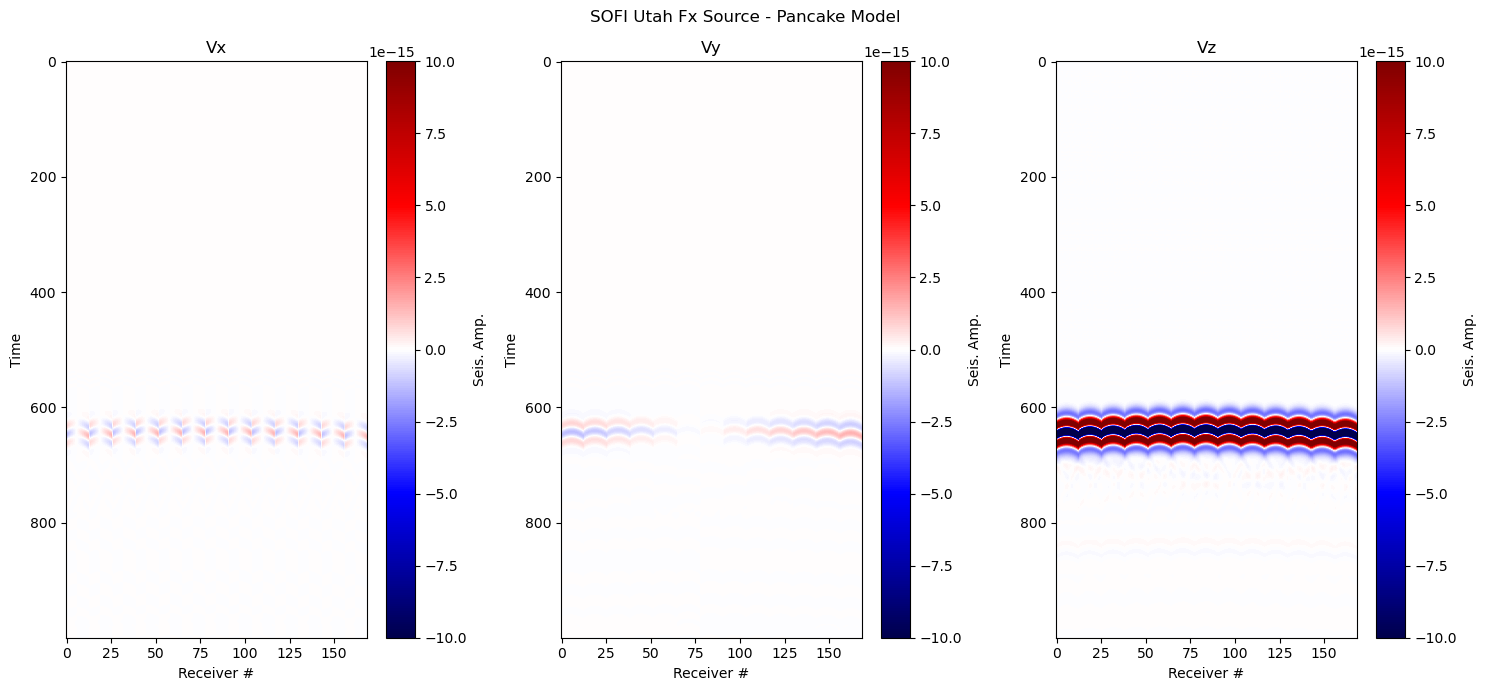

In [23]:
fig,axs = plt.subplots(1,3,figsize=[15,7])
traceimage(vx, clim=1e-14, ax=axs[0])
traceimage(vz, clim=1e-14, ax=axs[1])
traceimage(vy, clim=1e-14, ax=axs[2])
    
axs[0].set_title('Vx')
axs[1].set_title('Vy')
axs[2].set_title('Vz')

plt.suptitle('SOFI Utah Fx Source - Pancake Model')
plt.tight_layout()

# MULTISHOT READING SEISMOGRAMS

In [24]:
vx = np.zeros([n_srcs, nr, nt])
vy = np.zeros([n_srcs, nr, nt])
vz = np.zeros([n_srcs, nr, nt])
for i,srcnum in enumerate(range(n_srcs)):    
    vx[i]  = read_seis(os.path.join(shaheen_incoming,seispath,'%s_vx.txt.shot%.i'%(expname,srcnum+1)), nr)
    vy[i]  = read_seis(os.path.join(shaheen_incoming,seispath,'%s_vy.txt.shot%i'%(expname,srcnum+1)), nr)
    vz[i]  = read_seis(os.path.join(shaheen_incoming,seispath,'%s_vz.txt.shot%i'%(expname,srcnum+1)), nr)


In [32]:
np.sum(vz[0]-vz[25])

-4.430969924673832e-15

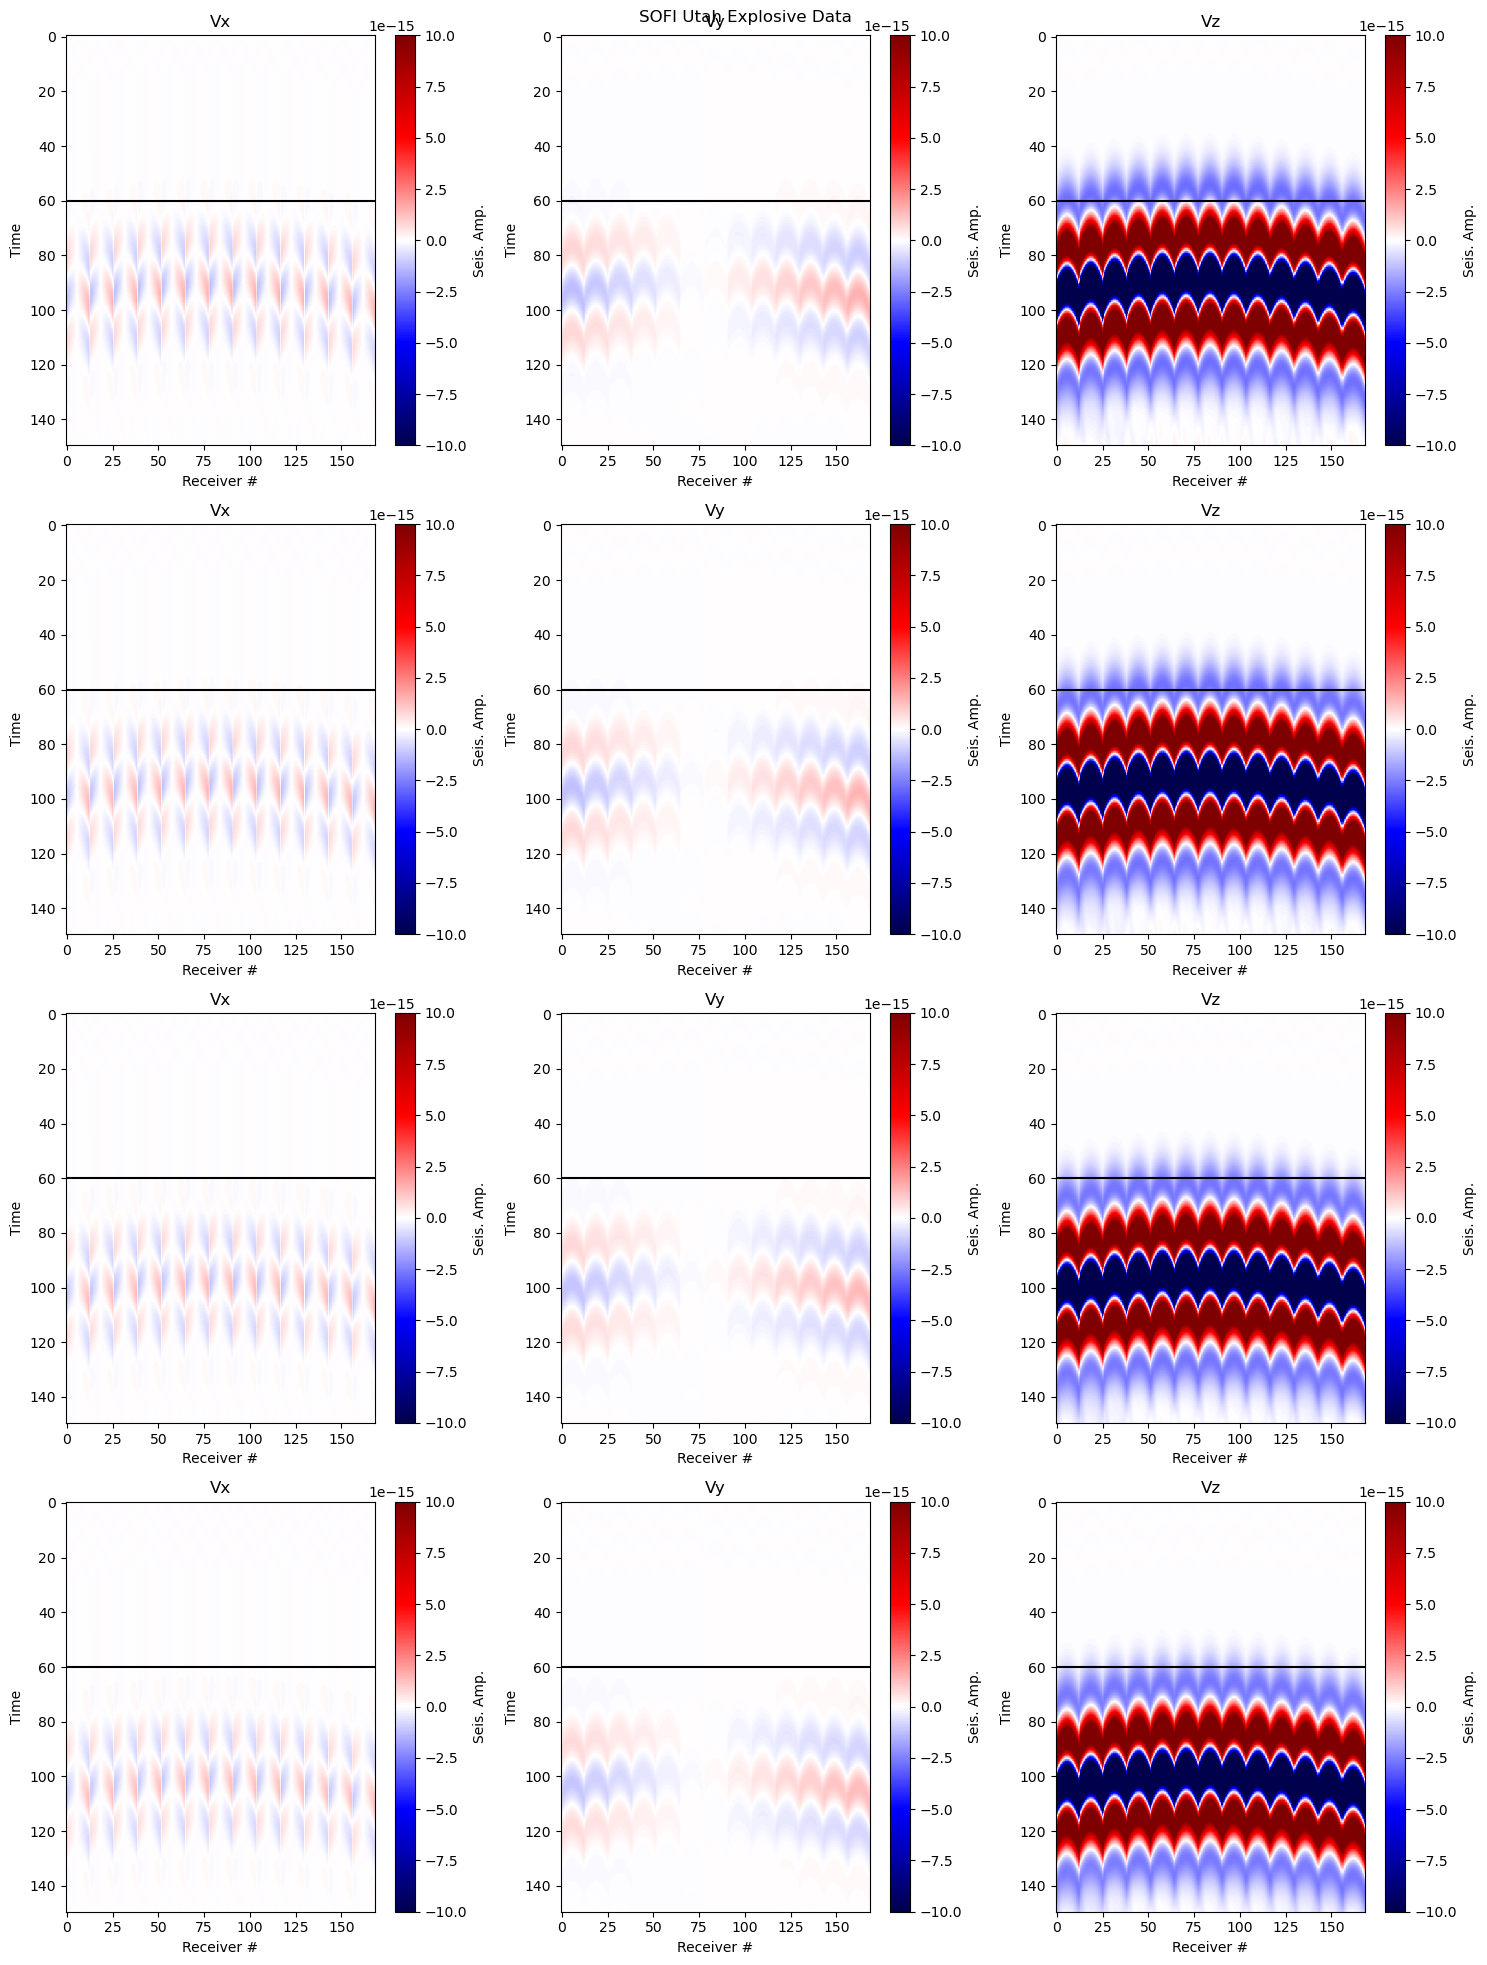

In [35]:
fig,axs = plt.subplots(4,3,figsize=[15,20])
for i in range(4):
    traceimage(vx[i*10,:,550:700],  clim=1e-14, ax=axs[i,0])
    traceimage(vz[i*10,:,550:700],  clim=1e-14, ax=axs[i,1])
    traceimage(vy[i*10,:,550:700],  clim=1e-14, ax=axs[i,2])

for ax in axs[:,0]:ax.set_title('Vx')
for ax in axs[:,1]:ax.set_title('Vy')
for ax in axs[:,2]:ax.set_title('Vz')
for ax in axs.ravel():ax.axhline(60, c='k')
plt.suptitle('SOFI Utah Explosive Data')
plt.tight_layout()